## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names']) # формируем матрицу "объект-признаки"
y = data['target'] # вектор правильных ответов
X.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().sum()
# в наборе данных нет пропущенных значений

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
# категориальные признаки имеют тип "object"
cat_sum = (X.dtypes == "object").values.sum()
cat_sum
# вывод: в наборе данных нет категориальных признаков

0

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split # импортируем специальную функцию
np.random.seed(0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
print('NN   ', 'Train   ', 'Test   ')

# сначала отмасштабируем признаки
scaler = StandardScaler()
X_train_stand = pd.DataFrame(scaler.fit_transform(X_train[["alcohol",'magnesium']]))
X_test_stand = pd.DataFrame(scaler.transform(X_test[["alcohol",'magnesium']]))


k_num = [1, 3, 5, 10, 15, 25] # для удобства запустим цикл по списку значений для k из условия задачи
for k in k_num:
  y_predicted = (
        KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train_stand, y_train)
    )
  train_result = y_predicted.predict(X_train_stand)
  test_result = y_predicted.predict(X_test_stand)

  print('{:<5} {:<8} {:<20}'.format(k, round(accuracy_score(train_result, y_train), 2), round(accuracy_score(test_result, y_test), 2)))

NN    Train    Test   
1     1.0      0.67                
3     0.81     0.78                
5     0.75     0.72                
10    0.73     0.78                
15    0.73     0.8                 
25    0.67     0.8                 


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
# !pip install mlxtend

In [10]:
%pip install mlxtend --upgrade

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

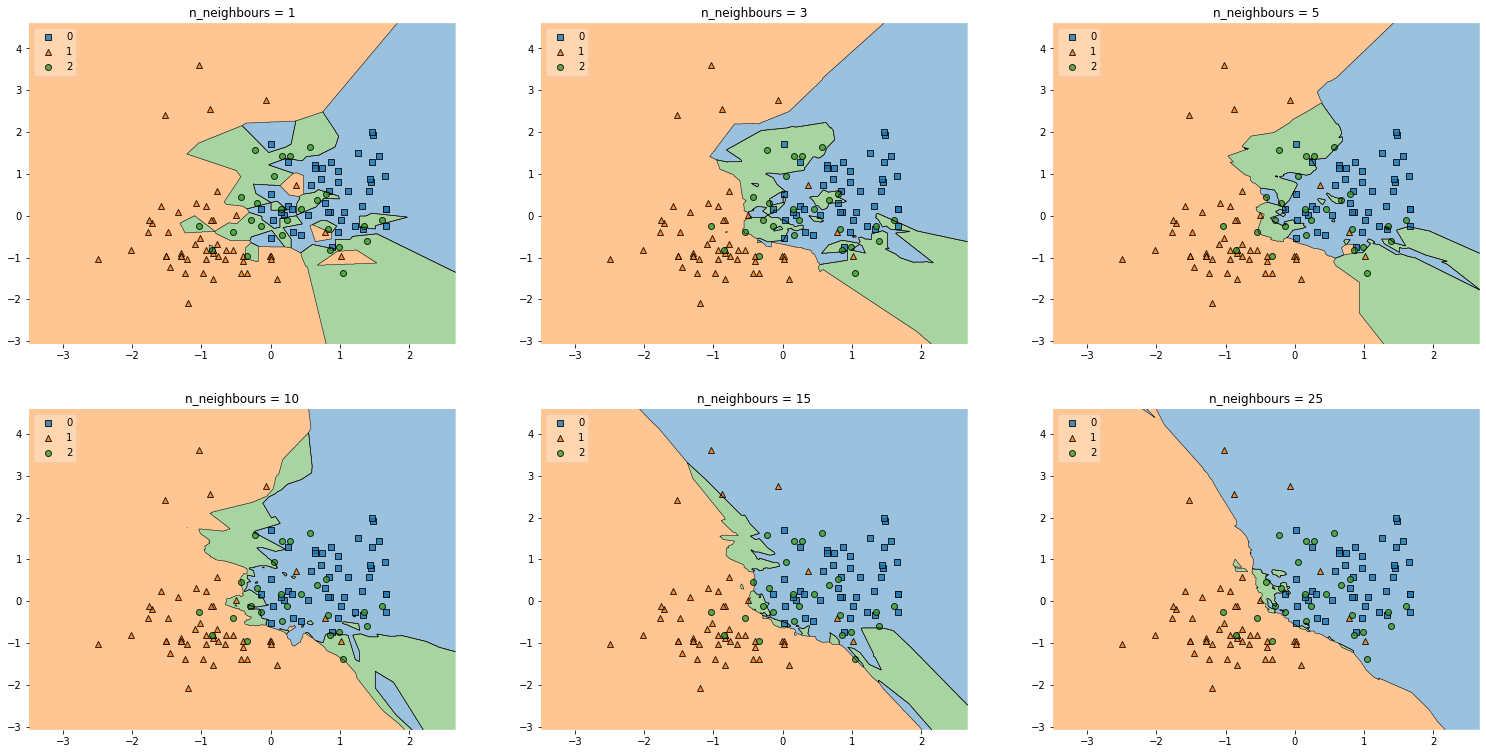

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
k_num = [1, 3, 5, 10, 15, 25]

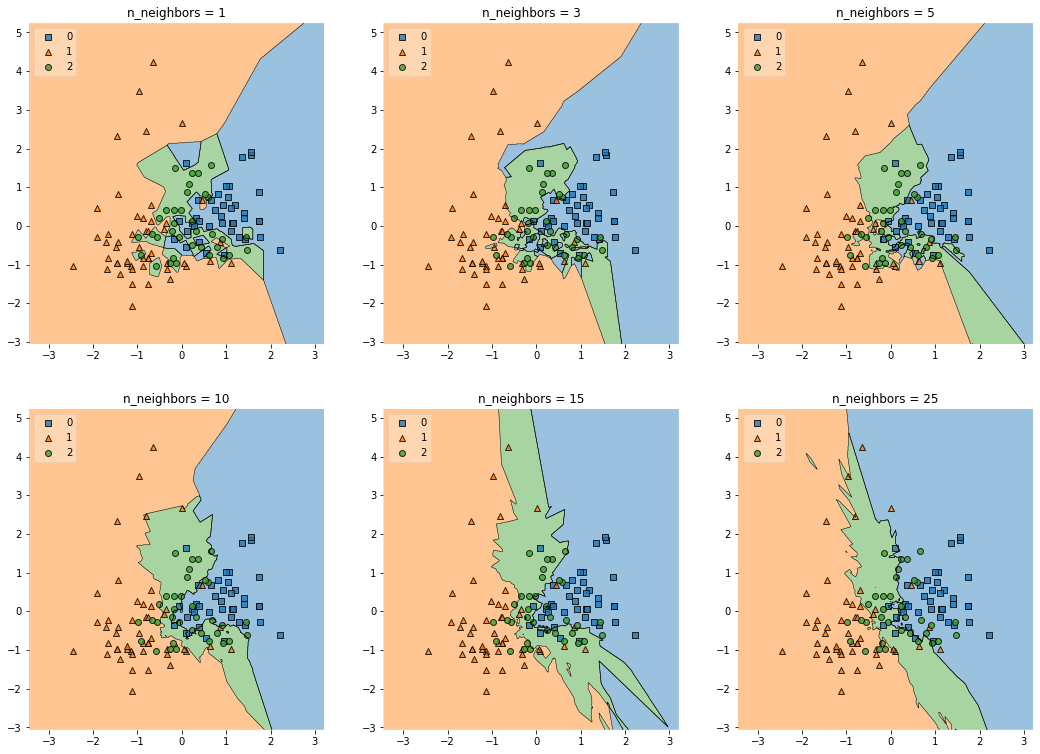

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean').fit(X_train_stand, y_train)
clf3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(X_train_stand, y_train)
clf5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train_stand, y_train)
clf10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean').fit(X_train_stand, y_train)
clf15 = KNeighborsClassifier(n_neighbors=15, metric='euclidean').fit(X_train_stand, y_train)
clf25 = KNeighborsClassifier(n_neighbors=25, metric='euclidean').fit(X_train_stand, y_train)

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(18,13))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25' ]
for clf, lab, grd in zip([clf1, clf3, clf5, clf10, clf15, clf25],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train_stand.to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Вывод:**

Для **k=1, k=3, k=5** модель переобучается (сильно подгоняется под данные), что можно заметить по графикам, особенно по их граничным участкам, так как они сильно выраженные ("ямы" и "островки" разных цветов, особенно зеленого и синего).

Для **k=10, k=15** модель меньше подгоняется под данные обучающей выборки, растет ошибка и на train, и на test (для k=15 ошибка на train не изменяется),
по графикам можно видеть, что модель пытается подстроиться под конкретнные данные (особенно на k=15).


По моему мнению, **k=25** является оптимальным для обучения классификатора. По решающей поверхности видно, что модель не подгоняется под данные. Ошибка на обучающей выборке увеличилась, а на тестовой не изменилась.




### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

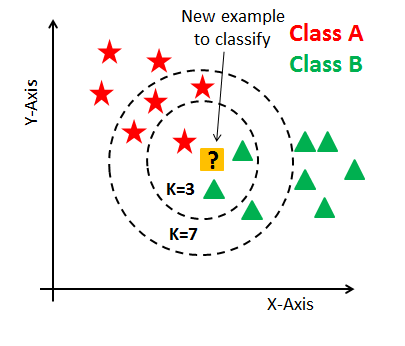

In [12]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      neigh = []
      for i in range(len(X)):
        distance = np.linalg.norm(X[i] - self.X_train, axis = 1)
        sort_index = np.argsort(distance)[:self.k] # argsort() возвращает индексы, сортирующие элементы исходного массива
        element = self.y_train[sort_index]
        neigh.append(max(Counter(element)))
      return np.array(neigh)


In [13]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [14]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [16]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [17]:
data.isnull().sum()
# пропущенных значений нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [18]:
# столбец "Unnamed: 0" не содержит дополнительную информацию о данных => его можно удалить
data = data.drop(["Unnamed: 0"], axis = 1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
data.corr() # выводим матрицу выборочных корреляций
# вещественные признаки carat(0.92) , x(0.88) , y(0.87) , z(0.86) коррелируют с целевой переменной price больше всего

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [19]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first = True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [20]:
X = data.drop(['price'], axis = 1) # формируем матрицу "объект-признаки"
y = data['price'] # вектор правильных ответов
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16259,1.01,62.0,57.0,6.44,6.36,3.97,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24005,1.54,62.6,56.0,7.42,7.35,4.62,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12211,1.15,63.1,63.0,6.63,6.53,4.15,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
37918,0.41,60.6,57.0,4.79,4.84,2.92,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,0.54,61.5,57.0,5.24,5.26,3.23,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.52,60.7,59.0,5.18,5.14,3.13,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
52416,0.70,63.6,60.0,5.59,5.51,3.51,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42613,0.32,61.3,58.0,4.35,4.39,2.68,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
43567,0.41,61.0,57.0,4.81,4.79,2.93,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
# list(X_train)

['carat',
 'depth',
 'table',
 'x',
 'y',
 'z',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [22]:
scaler = StandardScaler()
X_train_stand = pd.DataFrame(scaler.fit_transform(X_train[["carat", "depth","table","x", "y", "z"]]))
X_test_stand = pd.DataFrame(scaler.transform(X_test[["carat", "depth","table","x", "y", "z"]]))
# X_train_stand

In [23]:
X_train_result = np.concatenate((
    X_train.drop(['carat', 'depth', 'table', 'x', 'y', 'z'], axis=1).to_numpy(),
    X_train_stand),
    axis=1)

X_test_result = np.concatenate((
    X_test.drop(['carat', 'depth', 'table', 'x', 'y', 'z'], axis=1).to_numpy(),
    X_test_stand),
    axis=1)
X_train_result

array([[ 0.        ,  1.        ,  0.        , ...,  0.63051037,
         0.5406633 ,  0.60546131],
       [ 0.        ,  1.        ,  0.        , ...,  1.50304879,
         1.39777058,  1.51948596],
       [ 0.        ,  0.        ,  0.        , ...,  0.79967598,
         0.68784334,  0.85857583],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -1.23031139,
        -1.16489362, -1.20852608],
       [ 0.        ,  1.        ,  0.        , ..., -0.82075253,
        -0.81858765, -0.85697814],
       [ 0.        ,  1.        ,  0.        , ...,  0.4524413 ,
         0.39348326,  0.36640871]])

In [24]:
dp = pd.DataFrame(X_train_result)
dp

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.586462,-0.735774,0.694075,-0.491325,-0.515570,-0.575740
37754,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.207259,1.285965,1.141980,-0.126283,-0.195237,-0.041387
37755,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,-1.007799,-0.317483,0.246171,-1.230311,-1.164894,-1.208526
37756,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.818197,-0.526628,-0.201734,-0.820753,-0.818588,-0.856978


In [ ]:
# list(dp)

In [25]:
dp.columns = ['cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_E','color_F','color_G','color_H',
 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
 'clarity_VVS2','carat', 'depth', 'table', 'x', 'y', 'z',]
dp
# поэтапно создаем новый датафрейм с конечными результатами масштабирования и OneHot-кодирования, сопоставляя названия колонок с X_train
# позже я заметила, что при np.concatenate можно было просто поменять переменые местами и следовательно не создавать новый датафрейм
# решила оставить изначальный вариант как альтернативное решение, но понимаю что оптимальным решением является изменение переменных в np.concatenate

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.586462,-0.735774,0.694075,-0.491325,-0.515570,-0.575740
37754,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.207259,1.285965,1.141980,-0.126283,-0.195237,-0.041387
37755,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,-1.007799,-0.317483,0.246171,-1.230311,-1.164894,-1.208526
37756,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.818197,-0.526628,-0.201734,-0.820753,-0.818588,-0.856978


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
lr = LinearRegression().fit(X_train_result, y_train)
print(f"MSE for train: {mean_squared_error(y_train, lr.predict(X_train_result))}")
print(f"MSE for test: {mean_squared_error(y_test, lr.predict(X_test_result))}")

MSE for train: 1284661.862119126
MSE for test: 1259159.1137946642


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [29]:
pd.DataFrame(data = lr.coef_, index = dp.columns).sort_values(by=0, ascending = False)

# выделяются оценки коэффициентов переменных - carat, x и у всех вида clarity_<...>
# у этих вещественных переменных оценки коэффициентов по модулю на порядок превышают оценки прочих вещественных переменных

,0
clarity_IF,5333.555069
carat,5278.119984
clarity_VVS1,5021.558583
clarity_VVS2,4954.598502
clarity_VS1,4592.448267
clarity_VS2,4272.557381
clarity_SI1,3670.378092
clarity_SI2,2701.868098
cut_Ideal,795.786817
cut_Premium,721.797535


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [30]:
from sklearn.linear_model import Lasso, Ridge

In [31]:
lasso = Lasso(alpha=10).fit(X_train_result, y_train)
ridge = Ridge(alpha=10).fit(X_train_result, y_train)

In [32]:
pd.DataFrame(data = lasso.coef_, index = dp.columns).sort_values(by=0, ascending = False)

,0
carat,4717.436623
clarity_IF,1366.030116
clarity_VVS1,1242.682949
clarity_VVS2,1240.400739
clarity_VS1,909.097299
clarity_VS2,655.281123
cut_Ideal,157.779849
cut_Very Good,82.923344
clarity_SI1,70.541880
cut_Premium,64.974044


In [33]:
pd.DataFrame(data = ridge.coef_, index = dp.columns).sort_values(by=0, ascending = False)

,0
carat,5228.441290
clarity_IF,4760.472197
clarity_VVS1,4470.745336
clarity_VVS2,4411.391730
clarity_VS1,4055.762262
clarity_VS2,3741.392263
clarity_SI1,3142.790422
clarity_SI2,2182.154617
cut_Ideal,823.308089
cut_Premium,746.147154


In [ ]:
# вывод: Lasso-регрессия сильно уменьшила веса у вещественных переменных
# в изначальной регресии была сильная мультиколлинеарность

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

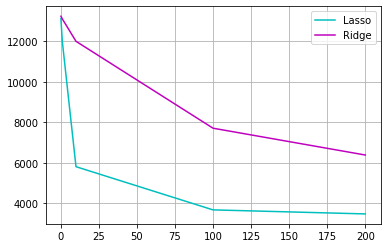

In [ ]:
l_euclidean, r_euclidean = [], []
a_num = [0.1, 1, 10, 100, 200]

for a in a_num:
    l = Lasso(alpha=a).fit(X_train_result, y_train)
    r = Ridge(alpha=a).fit(X_train_result, y_train)
    l_euclidean.append(np.linalg.norm(l.coef_))
    r_euclidean.append(np.linalg.norm(r.coef_))

plt.plot([0.1, 1, 10, 100, 200], l_euclidean, label="Lasso", color='c')
plt.plot([0.1, 1, 10, 100, 200], r_euclidean, label="Ridge", color='m')
plt.grid()
plt.legend()

In [ ]:
# l_euclidean = []
# l = Lasso(alpha=1).fit(X_train_stand, y_train)
# l_euclidean.append(np.linalg.norm(l.coef_))
# l_euclidean

**Вывод:**

Lasso-регрессия агрессивнее уменьшает веса и, таким образом, приводит к отбору признаков, так как незначительные оценки коэффициентов зануляются.

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [34]:
from sklearn.linear_model import LassoCV

In [35]:
reg = LassoCV(alphas =[0.1, 1, 10, 100, 200], cv=5, random_state=0).fit(X_train_result, y_train)
alphs = np.mean(reg.mse_path_, axis = 1) # матрица ошибок
z_alphs = sorted(zip(alphs, reg.alphas_))
print("Оптимальное значение для параметра α:", z_alphs[0][1])
# в следующих пунктах будем использовать α = 0.1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1172342462.6287155, tolerance: 48309472.87280814
  model = cd_fast.enet_coordinate_descent_gram(


Оптимальное значение для параметра α: 1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [39]:
lasso_result = Lasso(alpha=0.1).fit(X_train_result, y_train)
lasso_result.coef_
pd.DataFrame(data = lasso_result.coef_, index = dp.columns).sort_values(by=0, ascending = False)
# наиболее информативные признаки - carat, x и clarity, что легко интерпретировать, так как это основные характеристики бриллиантах
# неинформативные - z, y (сильная корреляция с x)

,0
clarity_IF,5279.153456
carat,5272.217424
clarity_VVS1,4969.104618
clarity_VVS2,4902.891165
clarity_VS1,4541.079057
clarity_VS2,4221.982297
clarity_SI1,3620.123261
clarity_SI2,2652.035864
cut_Ideal,785.744726
cut_Premium,711.659754


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [40]:
lasso_result = Lasso(alpha=0.1).fit(X_train_result, y_train)
prediction = lasso_result.predict(X_test_result)
print(f"Test: {mean_squared_error(prediction, y_test)}")
# в данном случае для предсказаний лучше использовать линейную регрессию, так как у нее среднеквадратичная ошибка на test меньше, чем у Lasso регрессии

Test: 1259488.1626680589
